In [36]:
import numpy as np
from scipy.stats.distributions import norm
import matplotlib.pylab as plt
import matplotlib.cbook
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import sys
sys.path.append('../zdrojaky')
from tsplot import tsplot
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning,matplotlib.cbook.mplDeprecation))
np.set_printoptions(precision=3)
import scipy.stats as ss
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import numpy as np
from scipy.stats.distributions import norm
import matplotlib.pylab as plt
import matplotlib.cbook
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import sys
sys.path.append('../zdrojaky')
from tsplot import tsplot
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning,matplotlib.cbook.mplDeprecation))
np.set_printoptions(precision=3)
from statsmodels.tsa.ar_model import AutoReg


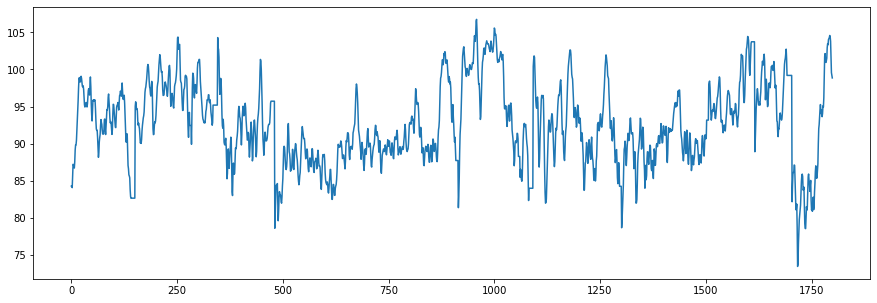

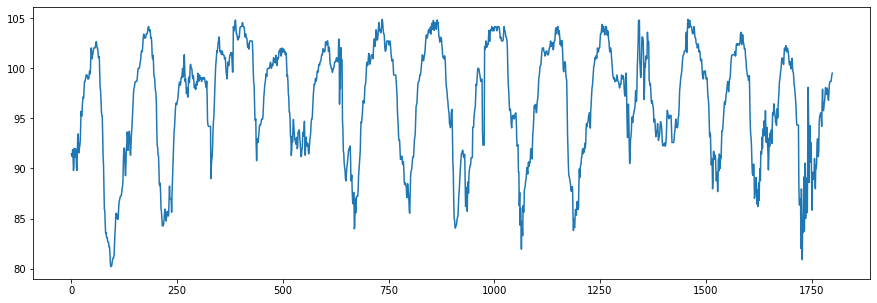

In [8]:
with open("./hr.11839.txt") as f:
    d1 = f.readlines()
d1 = [float(a.rstrip()) for a in d1]
plt.figure(figsize=(15, 5))
plt.plot(d1)
plt.show()
with open("./hr.7257.txt") as f:
    d2 = f.readlines()
d2 = [float(a.rstrip()) for a in d2]
plt.figure(figsize=(15, 5))
plt.plot(d2)
plt.show()

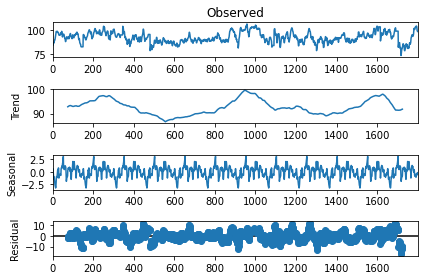

In [5]:
result = seasonal_decompose(d1, period=150, model='additive')
result.plot()
plt.show()

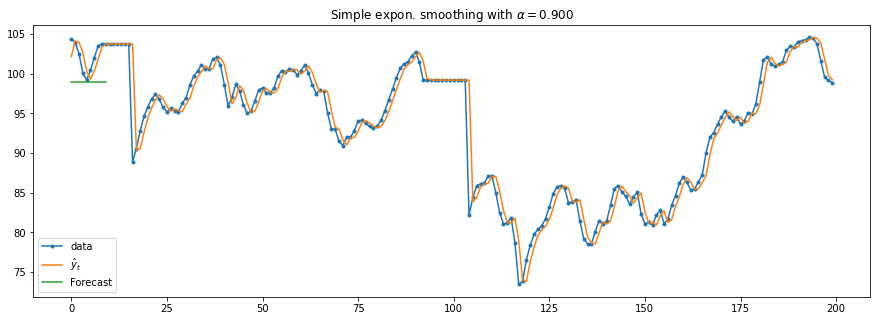

In [21]:
dt = d1[-200:]
alpha = 0.9
method = smt.SimpleExpSmoothing(dt, initialization_method="heuristic")
fit = method.fit(smoothing_level=alpha,optimized=False)
# fit = method.fit()
fcast = fit.forecast(10)

plt.figure(figsize=(15, 5))
plt.title(fr"Simple expon. smoothing with $\alpha = {fit.model.params['smoothing_level']:.3f}$")
plt.plot(dt, marker='.', label='data')
plt.plot(fit.fittedvalues, label=r'$\hat{y}_t$')
plt.plot(fcast, label='Forecast')
plt.legend()
plt.show()

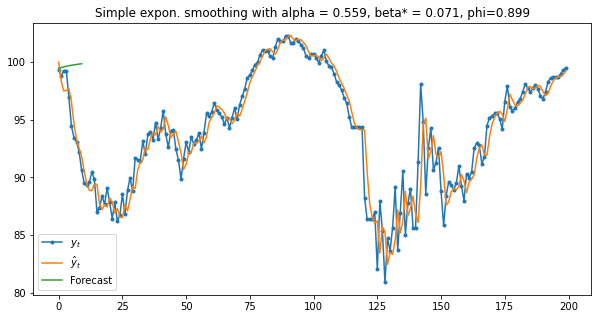

In [23]:
dt = d2[-200:]
method = smt.ExponentialSmoothing(dt, initialization_method="estimated", 
                                  trend='add', damped_trend=True, seasonal=None)
fit = method.fit(smoothing_level=.8, smoothing_trend=.8, damping_trend=.85, 
                smoothing_seasonal=None)
fit = method.fit()
fcast = fit.forecast(10)

plt.figure(figsize=(10, 5))
plt.title(fr"Simple expon. smoothing with alpha = {fit.model.params['smoothing_level']:.3f}, " 
         + fr"beta* = {fit.model.params['smoothing_trend']:.3f}, "
         + fr"phi={fit.model.params['damping_trend']:.3f}")
plt.plot(dt, marker='.', label=r'$y_t$')
plt.plot(fit.fittedvalues, label=r'$\hat{y}_t$')
plt.plot(fcast, label='Forecast')
plt.legend()
plt.show()

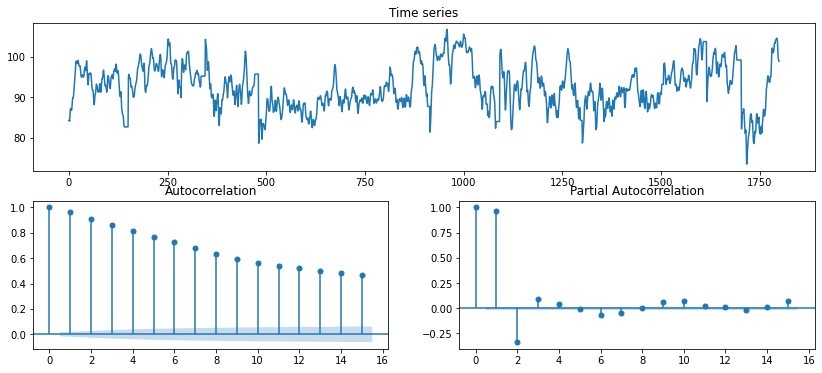

In [25]:
tsplot(d1)

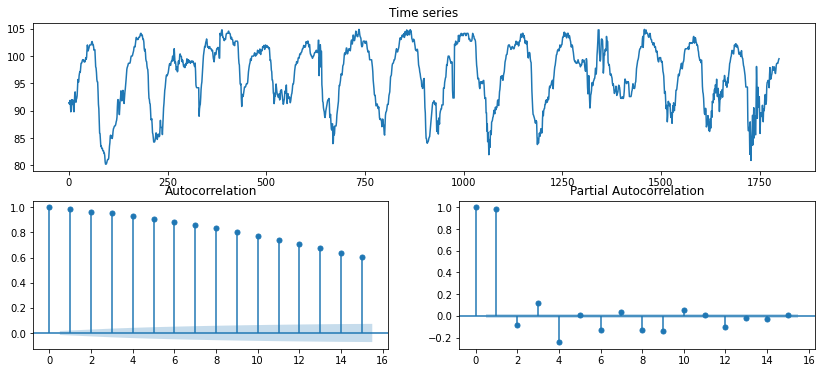

In [26]:
tsplot(d2)

In [63]:
res1 = AutoReg(d1, lags = 2, trend='c').fit()
display(res1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1800
Model:                     AutoReg(2)   Log Likelihood               -3044.539
Method:               Conditional MLE   S.D. of innovations              1.316
Date:                Sat, 01 Oct 2022   AIC                              0.553
Time:                        21:12:16   BIC                              0.565
Sample:                             2   HQIC                             0.558
                                 1800                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.1140      0.529      7.777      0.000       3.077       5.151
y.L1           1.2933      0.022     58.262      0.000       1.250       1.337
y.L2          -0.3376      0.022    -15.215      0.000      -0.381      -0.294
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0749           +0.0000j            1.0749            0.0000
AR.2            2.7554           +0.0000j            2.7554            0.0000
-----------------------------------------------------------------------------
"""

In [140]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1800
Model:                     AutoReg(9)   Log Likelihood               -2424.330
Method:               Conditional MLE   S.D. of innovations              0.937
Date:                Sat, 01 Oct 2022   AIC                             -0.118
Time:                        21:31:38   BIC                             -0.085
Sample:                             9   HQIC                            -0.106
                                 1800                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5024      0.394      6.350      0.000       1.730       3.275
y.L1           1.0991      0.023     46.972      0.000       1.053       1.145
y.L2          -0.2944      0.035     -8.425      0.000      -0.363      -0.226
y.L3           0.4253      0.035     11.991      0.000       0.356       0.495
y.L4          -0.3080      0.037     -8.390      0.000      -0.380      -0.236
y.L5           0.1698      0.037      4.563      0.000       0.097       0.243
y.L6          -0.1375      0.037     -3.746      0.000      -0.209      -0.066
y.L7           0.1386      0.035      3.909      0.000       0.069       0.208
y.L8           0.0205      0.035      0.587      0.557      -0.048       0.089
y.L9          -0.1392      0.023     -5.956      0.000      -0.185      -0.093
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0666           -0.0466j            1.0676           -0.0069
AR.2            1.0666           +0.0466j            1.0676            0.0069
AR.3            0.8438           -0.9331j            1.2580           -0.1330
AR.4            0.8438           +0.9331j            1.2580            0.1330
AR.5           -0.0937           -1.2182j            1.2218           -0.2622
AR.6           -0.0937           +1.2182j            1.2218            0.2622
AR.7           -0.8729           -0.8783j            1.2383           -0.3745
AR.8           -0.8729           +0.8783j            1.2383            0.3745
AR.9           -1.7403           -0.0000j            1.7403           -0.5000
-----------------------------------------------------------------------------
"""

In [142]:
# for lag in range(2, 8):
res2 = AutoReg(d2, lags = 9, trend='c').fit()
print(logl_AIC_BIC(res2.summary()))
print(modulus(res2.summary()))

(-2424.33, -0.118, -0.085)
[1.0676, 1.0676, 1.258, 1.258, 1.2218, 1.2218, 1.2383, 1.2383, 1.7403]


In [141]:
def logl_AIC_BIC(summary):
    data = a.tables[0].data
    logl = data[1][3]
    aic = data[3][3]
    bic = data[4][3]
    return float(logl), float(aic), float(bic)

def modulus(summary):
    data = a.tables[2].data
    data = a.tables[2].data[1:]
    return [float(modulus[3]) for modulus in data]

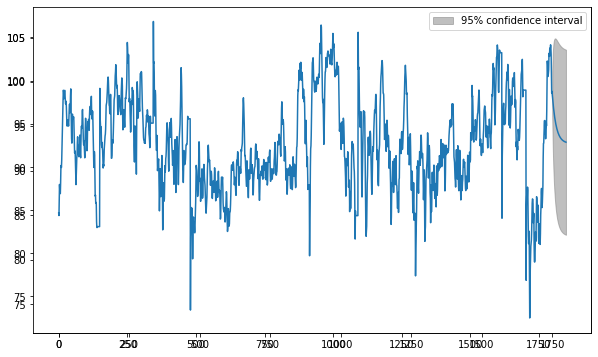

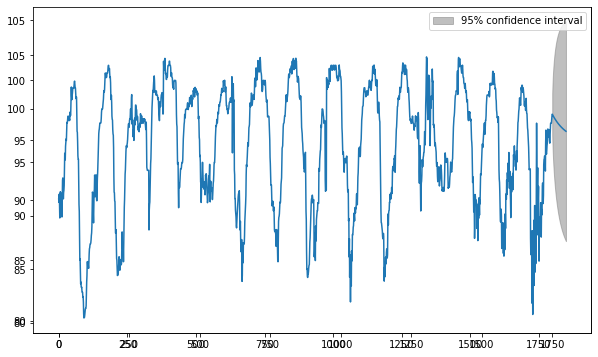

In [62]:
pred_from = 0 #ndat - 100
fcast_horizon = 50
fig = plt.figure(figsize=(10,6))
plt.plot(d1[pred_from:], label='x')
res1.plot_predict(pred_from, len(d1)+fcast_horizon, fig=fig)
plt.show()
fig = plt.figure(figsize=(10,6))
plt.plot(d2[pred_from:], label='x')
res2.plot_predict(pred_from, len(d2)+fcast_horizon, fig=fig)
plt.show()

/home/sutymate/anaconda3/envs/PDD/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


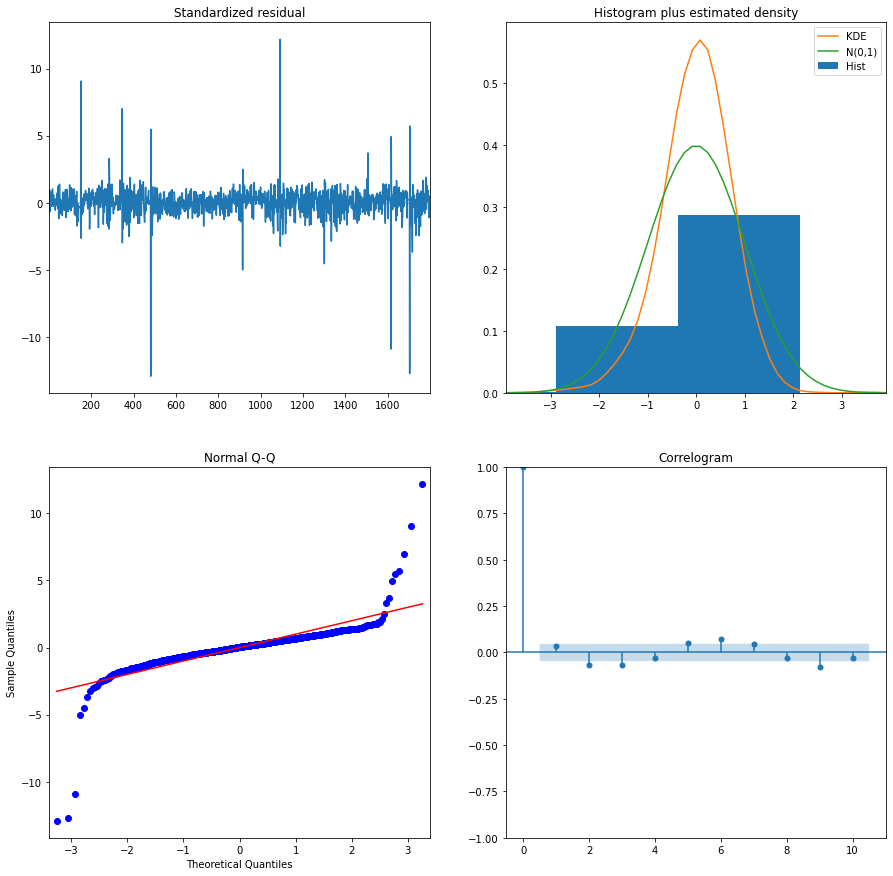

In [57]:
res1.plot_diagnostics(figsize=(15,15))
plt.show()

/home/sutymate/anaconda3/envs/PDD/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


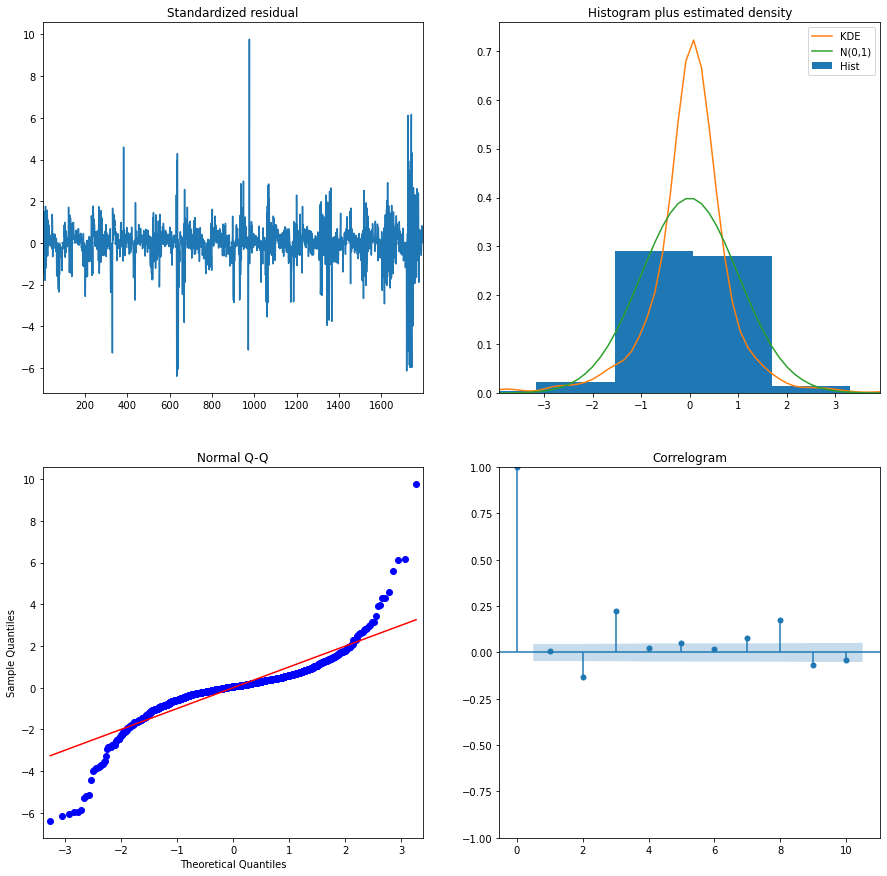

In [58]:
res2.plot_diagnostics(figsize=(15,15))
plt.show()

In [59]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
out = ar_select_order(d1, maxlag=10, ic='bic', trend='c')
print(f'Vhodné řády: {out.ar_lags}')

Vhodné řády: [1 2 3]


In [60]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
out = ar_select_order(d2, maxlag=10, ic='bic', trend='c')
print(f'Vhodné řády: {out.ar_lags}')

Vhodné řády: [1 2 3 4 5 6 7 8 9]
